## TALLER 1

Juan José Vargas - Johann Efren Barón

1. Descargue las series de tiempo de precios (ajustados) mensuales para el periodo Ene - 2010 a Dic - 2021 de las siguientes 4 acciones: MCD, GE, IBM, T. Con esta información:

In [ ]:
#Se importan las librerias
import pandas as pd
import numpy as np
import seaborn as sbn
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from matplotlib import pyplot as plt
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Los activos son:

MCD = McDonald's Corporation

GE = General Electric Company

IBM = International Business Machines Corporation

T = AT&T Inc.

In [ ]:
#Se definen los activos para poder desarrollar el ejercicio
activos = ["MCD","GE","IBM","T"]
#Se descargan los datos de cada activo
data = yf.download(activos,start="2010-01-01",end="2021-12-31", interval= "1Mo").dropna()
data_cl = data.loc[:,"Adj Close"]
data_cl

[*********************100%***********************]  4 of 4 completed


,GE,IBM,MCD,T
Date,,,,
2010-01-01,91.124481,76.034470,43.710960,7.295421
2010-02-01,91.011154,78.997856,44.705173,7.279537
2010-03-01,103.782242,80.031349,47.111683,7.581751
2010-04-01,107.545753,80.499359,49.844334,7.646297
2010-05-01,93.232925,78.165497,47.217613,7.283845
...,...,...,...,...
2021-08-01,105.016113,126.196457,232.276596,19.121511
2021-09-01,102.645004,126.366844,237.139893,18.835596
2021-10-01,104.559380,113.787476,241.506790,17.615223


a.) Calcule los retornos logarítmicos.

In [ ]:
#Se calculan los retornos logaritmicos
retornos = np.log(data_cl/data_cl.shift(1)).dropna()
retornos

,GE,IBM,MCD,T
Date,,,,
2010-02-01,-0.001244,0.038234,0.022490,-0.002180
2010-03-01,0.131313,0.012998,0.052432,0.040677
2010-04-01,0.035621,0.005831,0.056384,0.008477
2010-05-01,-0.142815,-0.029421,-0.054138,-0.048563
2010-06-01,-0.125612,-0.009200,-0.006700,-0.004537
...,...,...,...,...
2021-08-01,0.017320,-0.004408,-0.021868,0.001370
2021-09-01,-0.022837,0.001349,0.020721,-0.015065
2021-10-01,0.018479,-0.104857,0.018247,-0.066985


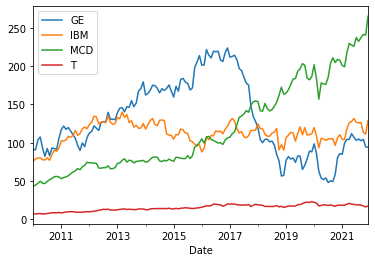

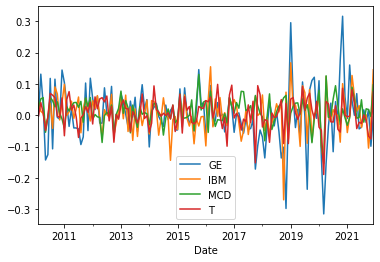

In [ ]:
data_cl.plot()
retornos.plot()

b. Calcule las estadísticas descriptivas (media, mediana, desv. estándar, curtosis, simetría) para cada uno de ellos. Presente los estadísticos en una tabla para todos los activos.

In [ ]:
#Se calcula la Media
media_act = retornos.mean()
media_act

GE     0.000231
IBM    0.003689
MCD    0.012605
T      0.006158
dtype: float64

In [ ]:
#Se calcula la Mediana
mediana_act = retornos.median()
mediana_act

GE    -0.001929
IBM    0.002619
MCD    0.011742
T      0.006484
dtype: float64

In [ ]:
#Se calcula la Desviación Estandar
devest_act = retornos.std()
devest_act

GE     0.086937
IBM    0.060536
MCD    0.042488
T      0.048299
dtype: float64

In [ ]:
#Se calcula la Kurtosis
kurto_act = kurtosis(retornos.dropna())
kurto_act

array([2.89381141, 2.52003555, 1.50003312, 1.45448091])

In [ ]:
#Se calcula la Asimetria
asime_act = skew(retornos.dropna())
asime_act

array([-0.08736847, -0.55869347, -0.40587771, -0.70046066])

In [ ]:
tabla = pd.DataFrame()
tabla["Media"] = media_act
tabla["Mediana"] = mediana_act
tabla["Desv. Estandar"] = devest_act
tabla["kurtosis"] = kurto_act
tabla["Simetría"] = asime_act
tabla

,Media,Mediana,Desv. Estandar,kurtosis,Simetría
GE,0.000231,-0.001929,0.086937,2.893811,-0.087368
IBM,0.003689,0.002619,0.060536,2.520036,-0.558693
MCD,0.012605,0.011742,0.042488,1.500033,-0.405878
T,0.006158,0.006484,0.048299,1.454481,-0.700461


Según el anterior dataframe anteriormente realizado, el promedio de los retornos más alto le pertenece a McDonald's Corporation (MCD) y en cuanto a volatilidad de acuerdo a la desviación estandar mensual que tiene, General Electric Company (GE) tiene un mayor número frente a los demás.

c. Presente en un Data Frame los retornos esperados y las volatilidades anualizadas

In [ ]:
dt = pd.DataFrame()
dt["R(E)"] = media_act*12
dt["Vol"] = devest_act*np.sqrt(12)
dt

,R(E),Vol
GE,0.002777,0.301157
IBM,0.044271,0.209703
MCD,0.151265,0.147183
T,0.073894,0.167311


d. Calcule la matriz de correlaciones de Pearson y de Sperman

In [ ]:
retornos.corr(method = "pearson")

,GE,IBM,MCD,T
GE,1.000000,0.363578,0.151318,0.346994
IBM,0.363578,1.000000,0.322564,0.412459
MCD,0.151318,0.322564,1.000000,0.338351
T,0.346994,0.412459,0.338351,1.000000


In [ ]:
retornos.corr(method = "spearman")

,GE,IBM,MCD,T
GE,1.000000,0.343396,0.091615,0.312855
IBM,0.343396,1.000000,0.260223,0.358745
MCD,0.091615,0.260223,1.000000,0.299497
T,0.312855,0.358745,0.299497,1.000000


d. Grafique el histograma de frecuencia de los retornos para dos de las cuatro acciones.

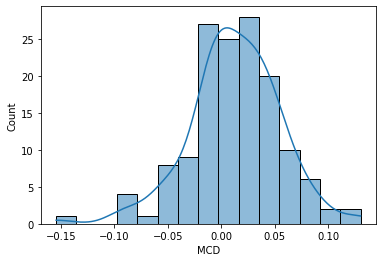

In [ ]:
sbn.histplot(retornos,x = "MCD", kde = True, bins = 15)

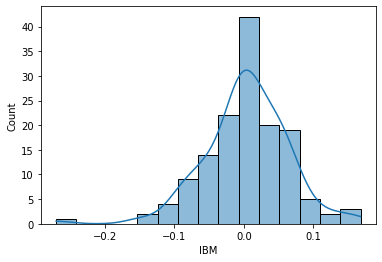

In [ ]:
sbn.histplot(retornos,x = "IBM", kde = True, bins = 15)

e. Implemente las pruebas de normalidad de Kolmogorov-Smirnov para todos los activos. Consolide los resultados en un Data Frame para todos.

In [ ]:
ks = pd.DataFrame()
ks["MCD"]= stats.kstest(retornos["MCD"],'norm')
ks["GE"]= stats.kstest(retornos["GE"],'norm')
ks["IBM"]= stats.kstest(retornos["IBM"],'norm')
ks["T"]= stats.kstest(retornos["T"],'norm')
ks

,MCD,GE,IBM,T
0,4.543298e-01,4.159825e-01,4.372657e-01,4.606995e-01
1,1.736399e-27,6.375039e-23,2.144125e-25,2.713426e-28


Aunque no tienen una normalidad latente, si presentan una aproximación a una distribución normal todos los datos aunque se logre apreciar un pequeño sesgo a la izquierda.

2. Con la misma información del punto 1:

a. Calcule la volatilidad mensual y anualizada de las series de retornos usando las medidas de: i) desviación estándar, ii) Parkinson, iii) Garman-Klass y, iv) volatilidad ponderada exponencial (EWMA) con una lambda de 0.94. Presente los resultados en un Data Frame

In [ ]:
sigma_m = retornos.std()
sigma_a = sigma_m*np.sqrt(12)
sigma_a

GE     0.301157
IBM    0.209703
MCD    0.147183
T      0.167311
dtype: float64

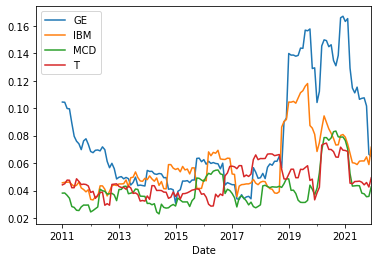

In [ ]:
roll_std = (retornos.rolling(window=12).std())
roll_std.plot()

## Medida de Parkinson

In [ ]:
lnHL = np.log(data["High"]/data["Low"]).dropna()
sigmaPark_m = ((1/(4*np.log(2)))*lnHL**2)**0.5

In [ ]:
sigmaPark_a = sigmaPark_m.mean()*np.sqrt(12)
sigmaPark_a

GE     0.267589
IBM    0.187842
MCD    0.147625
T      0.167825
dtype: float64

## Medida de Garman-Klass

In [ ]:
lnCO = np.log(data["Close"]/data["Open"]).dropna()
sigmaGK_m = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5

In [ ]:
sigmaGK_a = sigmaGK_m.mean()*np.sqrt(12)
sigmaGK_a

GE     0.274446
IBM    0.191380
MCD    0.152538
T      0.172823
dtype: float64

## Volatilidad EWMA

In [ ]:
def EWMAvol(retornos,Lambda):
  Lambda = 0.94
  m = len(retornos) 
  b = np.arange(m-1,-1,-1) 
  l = np.repeat(Lambda,m)

  varewma = ((np.power(retornos,2)*(np.power(l,b))).sum())*(1-Lambda)
  EWMAvol = np.sqrt(varewma)
  return (EWMAvol)

In [ ]:
GE = EWMAvol(retornos["GE"],Lambda)*np.sqrt(12)
IBM = EWMAvol(retornos["IBM"],Lambda)*np.sqrt(12)
MCD = EWMAvol(retornos["MCD"],Lambda)*np.sqrt(12)
T = EWMAvol(retornos["T"],Lambda)*np.sqrt(12)

In [ ]:
sigma_ewma_a = pd.DataFrame()
sigma_ewma_a[GE] = "GE"
sigma_ewma_a[IBM] = "IBM"
sigma_ewma_a[MCD] = "MCD"
sigma_ewma_a[T] = "T"
sigma_ewma_a.transpose()

""
0.365061
0.256371
0.181807
0.188278


In [ ]:
volat = pd.DataFrame()
volat["Std"] = sigma_a
volat["Parkinson,"] = sigmaPark_a
volat["Garman-Klass"] = sigmaGK_a
#volat["EWMA"] = sigma_ewma_a
volat

,Std,"Parkinson,",Garman-Klass
GE,0.301157,0.267589,0.274446
IBM,0.209703,0.187842,0.191380
MCD,0.147183,0.147625,0.152538
T,0.167311,0.167825,0.172823


En este caso se puede notar que General Electric Company (GE) posee una mayor volatilidad en cuanto a los datos historicos. En el caso de AT&T Inc. (T) tiene una menor volatilidad de sus datos historicos, lo cual la hace con menos riesgo. En cuanto a las demás acciones, tienen un riesgo medio en cuanto a las otras explicadas.

b. Para un solo activo de su elección, presente las gráficas para las últimas tres medidas de volatilidad.

## Medida de Parkinson

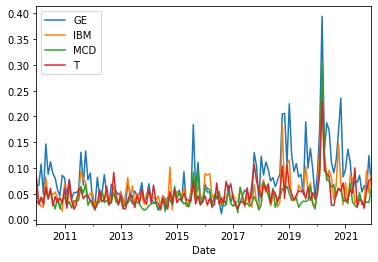

In [ ]:
sigmaPark_m.plot()

## Medida de Garman-Klass

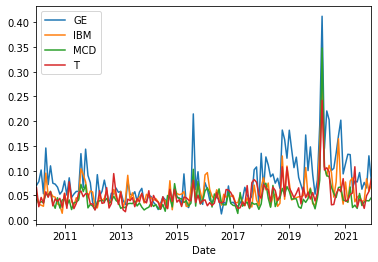

In [ ]:
sigmaGK_m.plot()

En los graficos se puede observar la volatilidad de General Electric Company (GE) en los ultimos años de la muestra de datos ya que fluctua mucho más que las otras.